In [2]:
import jax
import jax.numpy as jnp
import myjax.nn as nn
from myjax.utils import Dataset, DataLoader
import matplotlib.pyplot as plt

### Test against problems from Chap. 3 of D2L

#### Problem 3.3

(32, 2) (32, 1)

The model is: 
Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True), Total parameters: 3, 
)
Total parameters: 3

The initial parameters are: 
{0: {'weights': Array([[-0.40685526],
       [ 0.1863944 ]], dtype=float32), 'bias': Array([0.02744711], dtype=float32)}}

Epoch (    0/   10) train_loss = 29.065
Epoch (    1/   10) train_loss = 4.5138
Epoch (    2/   10) train_loss = 0.011675
Epoch (    3/   10) train_loss = 0.0098792
Epoch (    4/   10) train_loss = 0.0098442
Epoch (    5/   10) train_loss = 0.0099144
Epoch (    6/   10) train_loss = 0.0098947
Epoch (    7/   10) train_loss = 0.0098756
Epoch (    8/   10) train_loss = 0.009827
Epoch (    9/   10) train_loss = 0.0098589
Epoch (   10/   10) train_loss = 0.0098601

The final parameters are (with w = [ 2.  -3.4] and b = 4.2 as correct answer): 
{0: {'bias': Array([4.200332], dtype=float32), 'weights': Array([[ 1.9956353],
       [-3.4037552]], dtype=float32)}}
error in estimating w: [0.00436473 0.0

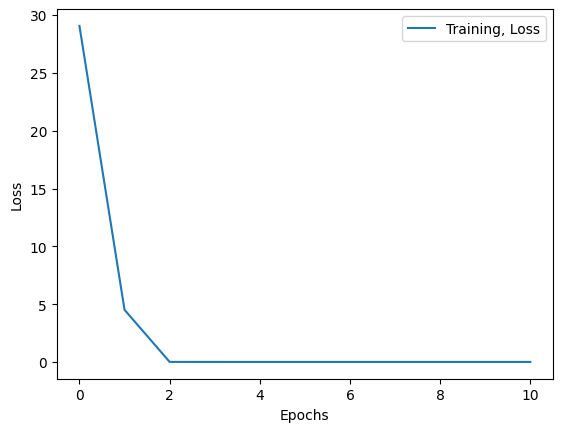

In [19]:
# Random data for testing
seed = 1701
key = jax.random.PRNGKey(seed)
key, x_key, n_key = jax.random.split(key, num=3)

# Create synthetic data
num_train=1000
num_val=1000
w = jnp.array([2, -3.4])
b = 4.2
n = num_train + num_val
noise = 0.1
noise = jax.random.normal(n_key, shape=(n,1))*noise

X = jax.random.normal(x_key, (n, len(w)))
y = X @ w.reshape(-1, 1) + b + noise


# Create dataset
dataset = Dataset(X, y)

# Create dataloader
data = DataLoader(dataset, key=key, batch_size=32)

for x, y in data:
    print (x.shape, y.shape)
    break


# Create model
model = nn.Sequential([nn.Linear(2,1) ])

# Initialize Model
key, l1_key = jax.random.split(key)
key, params = model.init(key)
print ('\nThe model is: ')
print (model)


# Initialize trainer
trainer = nn.Trainer(learning_rate=0.03)
print ('\nThe initial parameters are: ')
print (params)

# Fit model
params = trainer.fit(params, model, data, max_epochs = 10, log_epoch=1)
print (f'\nThe final parameters are (with w = {w} and b = {b} as correct answer): ')
print (params)

answ = w - params[0]['weights'].reshape(w.shape)
ansb = b - params[0]['bias']
print(f'error in estimating w: {answ}')
print(f'error in estimating b: {ansb}')

# Compare final answer
'''
plt.figure()
plt.scatter(jnp.arange(len(y)),y,label='Original data')
y_hat = jnp.array(model(params, X))
plt.scatter(jnp.arange(len(y)),y_hat,label='Model')
plt.legend();
''';

